# Exploratory Data Analysis of the Given Data Set (Before Cleaning)

## Read the Data Sets

Import initial libraries

In [18]:
#import pandas
import pandas as pd

#import os
import os

Initiate with relative paths

In [19]:
#Define directories
current_dir = os.getcwd()
project_dir = os.path.dirname(current_dir)
data_sets_dir = os.path.join(project_dir,'Data_Base', 'Data_Set_2023 - CIS 7031')
cleaned_data_sets_dir = os.path.join(project_dir,'Data_Base', 'Cleaned_Data_Set')

print (current_dir)
print (project_dir)
print (data_sets_dir)
print (cleaned_data_sets_dir)

c:\Users\Rameez\OneDrive\MSc Data Science\Assignment - CIS 7031 Programming for Data Analysis\Project - CIS 7031\Codes
c:\Users\Rameez\OneDrive\MSc Data Science\Assignment - CIS 7031 Programming for Data Analysis\Project - CIS 7031
c:\Users\Rameez\OneDrive\MSc Data Science\Assignment - CIS 7031 Programming for Data Analysis\Project - CIS 7031\Data_Base\Data_Set_2023 - CIS 7031
c:\Users\Rameez\OneDrive\MSc Data Science\Assignment - CIS 7031 Programming for Data Analysis\Project - CIS 7031\Data_Base\Cleaned_Data_Set


Read data from csv files to Python environment for processing

In [20]:
#Define the CSV files
employee_csv_file = 'Employee.csv'
fields_csv_file = 'Fields.csv'
workcode_csv_file = 'WorkCode.csv'
workdetails_csv_file = 'WorkDetails.csv'

#Define the relative path to the CSV files
employee_csv_path = os.path.join(data_sets_dir, employee_csv_file)
fields_csv_path = os.path.join(data_sets_dir, fields_csv_file)
workcode_csv_path = os.path.join(data_sets_dir, workcode_csv_file)
workdetails_csv_path = os.path.join(data_sets_dir, workdetails_csv_file)

In [21]:
#Read the CSV files
Employee_df = pd.read_csv(employee_csv_path)
Fields_df = pd.read_csv(fields_csv_path)
WorkCode_df = pd.read_csv(workcode_csv_path)
WorkDetails_df = pd.read_csv(workdetails_csv_path)

## Detailed description of each datasets, their properties and relationships

Employee Data Set

In [22]:
Employee_df

,Estate,Division,EmpCode,Gender,DateofJoin,PAMACT
0,EST,HO,2727,F,1/1/1972,A
1,EST,HO,11211,M,2/27/1975,T
2,EST,HO,29593,F,11/9/1972,A
3,EST,HO,37774,F,5/2/1973,A
4,EST,HO,37875,F,5/2/1973,A
...,...,...,...,...,...,...
2010,EST,UD,6063939,M,NaN,T
2011,EST,UD,6064040,M,NaN,A
2012,EST,UD,6064141,M,NaN,A
2013,EST,UD,6064242,M,NaN,T


In [23]:
Employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2015 entries, 0 to 2014
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Estate      2015 non-null   object
 1   Division    2015 non-null   object
 2   EmpCode     2015 non-null   int64 
 3   Gender      2015 non-null   object
 4   DateofJoin  1847 non-null   object
 5   PAMACT      2009 non-null   object
dtypes: int64(1), object(5)
memory usage: 94.6+ KB


In [24]:
#Count No of unique values in each columns of Employee data set
Employee_df.nunique()

Estate           1
Division         5
EmpCode       1932
Gender           2
DateofJoin     733
PAMACT           4
dtype: int64

In [25]:
#No of Employees in each Division
Employee_df['Division'].value_counts()

Division
UD    596
HO    487
MD    377
ST    318
LD    237
Name: count, dtype: int64

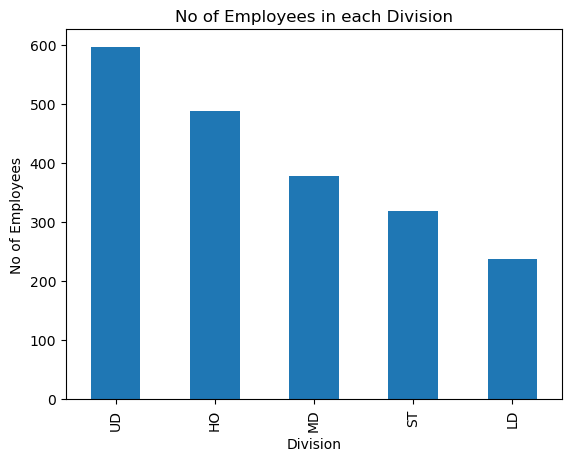

In [26]:
#import matplotlib
import matplotlib.pyplot as plt

#Plot the No of Employees in each Division
Employee_df['Division'].value_counts().plot(kind='bar')
plt.xlabel('Division')
plt.ylabel('No of Employees')
plt.title('No of Employees in each Division')
plt.show()

Fields Data Set

In [27]:
Fields_df

,ID,EState,Division,CropType,Field,Area (Ha),NumberOfTree,Type
0,2727,EST,HO,T,6A,0.8,9302,R
1,11211,EST,HO,T,3A,3.3,48100,R
2,29593,EST,HO,T,19,5.8,30015,R
3,37774,EST,HO,T,4B,2.5,14308,R
4,37875,EST,HO,T,FW1,0.3,4500,C
...,...,...,...,...,...,...,...,...
1927,6063939,EST,UD,T,GEN,3.0,17631,R
1928,6064040,EST,UD,T,OTH,0.8,9257,O
1929,6064141,EST,UD,T,5,5.0,31505,R
1930,6064242,EST,UD,T,9,6.3,48919,R


In [28]:
Fields_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1932 entries, 0 to 1931
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            1932 non-null   int64  
 1   EState        1932 non-null   object 
 2   Division      1932 non-null   object 
 3   CropType      1932 non-null   object 
 4   Field         1932 non-null   object 
 5   Area (Ha)     1932 non-null   float64
 6   NumberOfTree  1932 non-null   int64  
 7   Type          1932 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 120.9+ KB


In [29]:
#Unique values in each columns of Fields data set
Fields_df.nunique()

ID              1932
EState             1
Division           5
CropType           3
Field             63
Area (Ha)         18
NumberOfTree      34
Type               3
dtype: int64

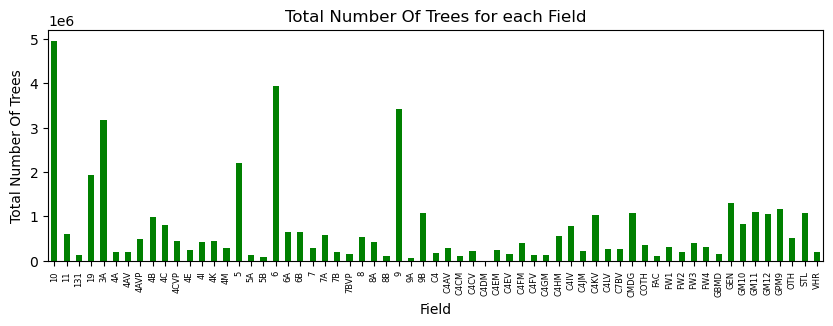

In [30]:
#Plot Total NumberOfTree for each Field Verticle X labels
Fields_df.groupby('Field')['NumberOfTree'].sum().plot(kind='bar', color='green', figsize=(10, 3), rot=0, align='center')
plt.xlabel('Field')
plt.xticks(fontsize=6,rotation=90)
plt.ylabel('Total Number Of Trees')
plt.title('Total Number Of Trees for each Field')
plt.show()

Work Code Data Set

In [31]:
WorkCode_df

,WorCode,Crop,Type
0,CHC,T,R
1,TPR,T,R
2,MUS,T,R
3,WBN,T,R
4,EFD,T,R
...,...,...,...
478,FIG,T,C
479,FWW,T,O
480,ITP,T,R
481,RNO,T,O


In [32]:
WorkCode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   WorCode  483 non-null    object
 1   Crop     483 non-null    object
 2   Type     479 non-null    object
dtypes: object(3)
memory usage: 11.4+ KB


In [33]:
#Unique values in each columns of WorkCode data set
WorkCode_df.nunique()

WorCode    481
Crop         1
Type         3
dtype: int64

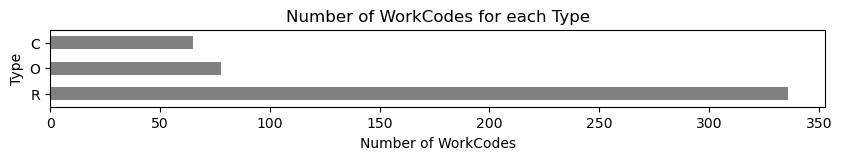

In [34]:
#Plot horizontal bar graph the Number of WorkCode for each Type
WorkCode_df['Type'].value_counts().plot(kind='barh',figsize=(10, 1), rot=0, align='center',color='Grey')
plt.xlabel('Number of WorkCodes')
plt.ylabel('Type')
plt.title('Number of WorkCodes for each Type')
plt.show()

Work Details Data Set

In [35]:
WorkDetails_df

,Year,Month,Day,Estate,Division,EmpCode,Work,Workdayfraction,Qty,ExtraKilos
0,2012,6,20,EST,HO,41107,ABS,1.0,22.0,0.0
1,2012,7,9,EST,HO,41309,PLK,1.0,22.0,0.0
2,2012,9,27,EST,HO,41309,PLK,1.0,22.0,0.0
3,2014,1,10,EST,HO,41309,PLK,1.0,22.0,0.0
4,2013,2,25,EST,HO,41309,PLK,1.5,22.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1048570,2012,6,29,EST,UD,6065353,XXX,1.0,NaN,NaN
1048571,2012,3,31,EST,UD,6065353,XXX,1.0,NaN,NaN
1048572,2015,8,13,EST,UD,6065353,XXX,1.0,NaN,NaN
1048573,2015,8,14,EST,UD,6065353,XXX,1.0,NaN,NaN


In [36]:
WorkDetails_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Year             1048575 non-null  int64  
 1   Month            1048575 non-null  int64  
 2   Day              1048575 non-null  int64  
 3   Estate           1048575 non-null  object 
 4   Division         1048575 non-null  object 
 5   EmpCode          1048575 non-null  int64  
 6   Work             1048575 non-null  object 
 7   Workdayfraction  1048575 non-null  float64
 8   Qty              907547 non-null   float64
 9   ExtraKilos       949751 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 80.0+ MB


In [37]:
#Unique values in each columns of WorkDetails data set
WorkDetails_df.nunique()

Year                  4
Month                12
Day                  31
Estate                1
Division              5
EmpCode            1561
Work                137
Workdayfraction       4
Qty                2411
ExtraKilos          428
dtype: int64

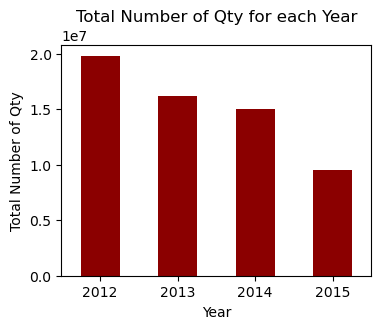

In [38]:
#Plot Total Number of Qty for each Year
WorkDetails_df.groupby('Year')['Qty'].sum().plot(kind='bar', color='DarkRed', figsize=(4, 3), rot=0, align='center')
plt.xlabel('Year')
plt.ylabel('Total Number of Qty')
plt.title('Total Number of Qty for each Year')
plt.show()

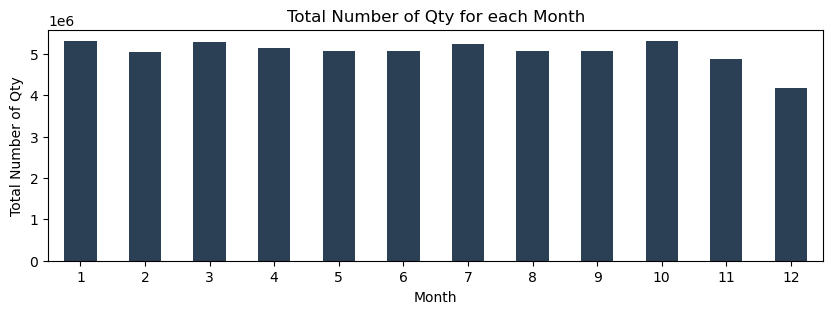

In [39]:
#Plot Total Number of Qty for each Month
WorkDetails_df.groupby('Month')['Qty'].sum().plot(kind='bar', color='#2c4055', figsize=(10, 3), rot=0, align='center')
plt.xlabel('Month')
plt.ylabel('Total Number of Qty')
plt.title('Total Number of Qty for each Month')
plt.show()

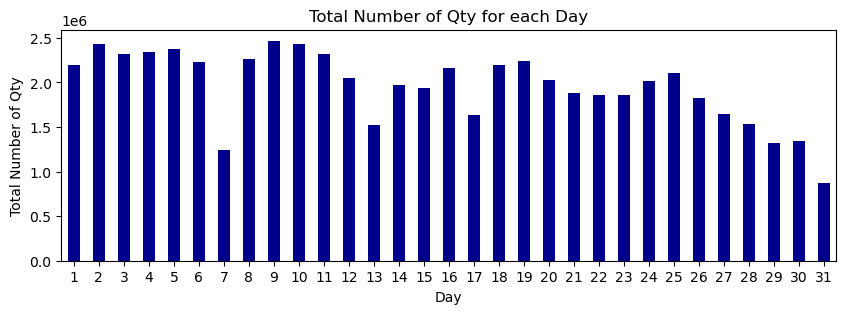

In [40]:
#Plot Total Number of Qty for each Day of the Month
WorkDetails_df.groupby('Day')['Qty'].sum().plot(kind='bar', color='DarkBlue', figsize=(10, 3), rot=0, align='center')
plt.xlabel('Day')
plt.ylabel('Total Number of Qty')
plt.title('Total Number of Qty for each Day')
plt.show()

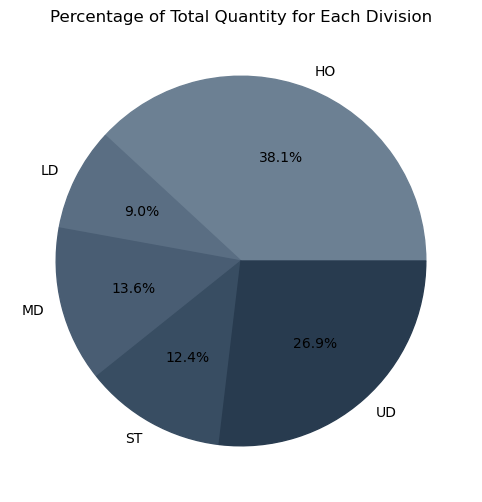

In [41]:
from matplotlib.colors import LinearSegmentedColormap

#Plot the percentage of total qty for each division
division_quantity_sum = WorkDetails_df.groupby('Division')['Qty'].sum()
division_quantity_percentage = division_quantity_sum / division_quantity_sum.sum() * 100

#Create a dark color gradient for the pie chart
dark_colors = ['#6c8093','#566a7f','#40556b','#2c4055','#192937']
dark_cmap = LinearSegmentedColormap.from_list('dark_cmap', dark_colors)

#Create a pie chart of the percentage of total quantity for each division
fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts, autotexts = ax.pie(division_quantity_percentage, labels=division_quantity_percentage.index, autopct='%1.1f%%')

#Set the pie chart colors
for i in range(len(wedges)):
    wedges[i].set_color(dark_cmap(i / len(wedges)))

#Set the pie chart title
ax.set_title('Percentage of Total Quantity for Each Division')

#Show the plot
plt.show()